In [1]:
import pandas as pd 
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
import pandas as pd
import yfinance as yf

In [14]:
nifty50 = pd.read_csv("datasets/Indices-for-2024/NIFTY_50.csv")
nifty_bank = pd.read_csv("datasets/Indices-for-2024/NIFTY BANK.csv")
nifty_smallcap250 = pd.read_csv("datasets/Indices-for-2024/NIFTY SMALLCAP 250.csv")
nifty_midcap150 = pd.read_csv("datasets/Indices-for-2024/NIFTY MIDCAP 150.csv")

In [20]:
nifty50['month_num'] = pd.DatetimeIndex(nifty50["Date"]).month

nifty_bank['month_num'] = pd.DatetimeIndex(nifty_bank["Date"]).month

nifty_smallcap250['month_num'] = pd.DatetimeIndex(nifty_smallcap250["Date"]).month

nifty_midcap150['month_num'] = pd.DatetimeIndex(nifty_midcap150["Date"]).month

In [23]:
nifty50["NIFTY50"] = np.log(nifty50["Close"]/(nifty50["Close"].shift(1)))

nifty_bank["NIFTYBANK"] = np.log(nifty_bank["Close"]/(nifty_bank["Close"].shift(1)))

nifty_smallcap250["NIFTYSMALLCAP"] = np.log(nifty_smallcap250["Close"]/(nifty_smallcap250["Close"].shift(1)))

nifty_midcap150["NIFTYMIDCAP150"] = np.log(nifty_midcap150["Close"]/(nifty_midcap150["Close"].shift(1)))

In [25]:
mr_nifty50 = pd.DataFrame(nifty50.groupby('month_num')['NIFTY50'].mean())
mr_nifty_bank = pd.DataFrame(nifty_bank.groupby('month_num')['NIFTYBANK'].mean())
mr_nifty_smallcap250 = pd.DataFrame(nifty_smallcap250.groupby('month_num')['NIFTYSMALLCAP'].mean())
mr_nifty_midcap150 = pd.DataFrame(nifty_midcap150.groupby('month_num')['NIFTYMIDCAP150'].mean())
print(mr_rs)

           RUSELL2000
month_num            
1           -0.000809
2           -0.000815
3            0.000274
4            0.002263
5            0.000889
6           -0.000092
7            0.001220
8            0.000937
9            0.000924
10          -0.000168
11           0.001118
12           0.001505


In [27]:
mr_nifty50['NIFTY50'] = round(mr_nifty50['NIFTY50']*100,2)
mr_nifty_bank['NIFTYBANK'] = round(mr_nifty_bank['NIFTYBANK']*100,2)
mr_nifty_smallcap250['NIFTYSMALLCAP'] = round(mr_nifty_smallcap250['NIFTYSMALLCAP']*100,2)
mr_nifty_midcap150['NIFTYMIDCAP150'] = round(mr_nifty_midcap150['NIFTYMIDCAP150']*100,2)

In [30]:
dff = mr_nifty50.merge(mr_nifty_bank,on='month_num').merge(mr_nifty_smallcap250,on='month_num').merge(mr_nifty_midcap150,on='month_num')

dfft = dff.transpose()

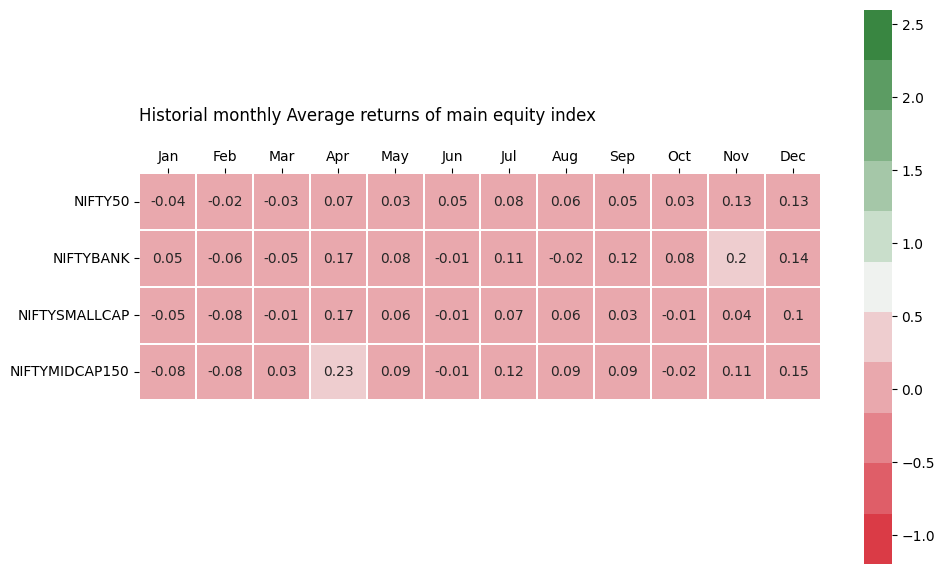

In [31]:
# figure
fig, ax = plt.subplots(figsize=(11, 9))
# plot heatmap
sb.heatmap(dfft, cmap=sb.diverging_palette(10, 130, n=11), vmin= -1.2, vmax=2.6, square=True,
           linewidth=0.3, annot=True , cbar_kws={"shrink": .8})
# xticks
ax.xaxis.tick_top()
xticks_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(12) + .5, labels=xticks_labels)
# axis labels
plt.xlabel('')
plt.ylabel('')
# title
title = 'Historial monthly Average returns of main equity index \n'
plt.title(title, loc='left')
plt.show()